# Basic time series exploration

In [1]:
from time_series_expenses.prepare_data import monthly

## Creating a Prophet model

In [2]:
monthly.head()

,y,ds
Date,,
2021-10-01,659.76,2021-10-01
2021-11-01,840.82,2021-11-01
2021-12-01,378.26,2021-12-01
2022-01-01,825.94,2022-01-01
2022-02-01,551.60,2022-02-01


In [3]:
from prophet import Prophet
model = Prophet()

model.fit(monthly)

13:51:54 - cmdstanpy - INFO - Chain [1] start processing
13:51:54 - cmdstanpy - INFO - Chain [1] done processing


In [4]:
# Predict next year
future = model.make_future_dataframe(periods = 12, freq = "MS")
forecast = model.predict(future)[["ds", "yhat", "yhat_lower", "yhat_upper"]]

forecast.tail(13)

,ds,yhat,yhat_lower,yhat_upper
29,2024-03-01,952.140845,706.120729,1191.160532
30,2024-04-01,1028.470628,792.276664,1262.941692
31,2024-05-01,1599.482397,1369.349572,1826.930680
32,2024-06-01,147.252904,-82.914202,388.364422
33,2024-07-01,1856.977252,1605.676706,2098.427654
34,2024-08-01,2533.920093,2298.451506,2765.587235
35,2024-09-01,1278.637344,1034.797780,1496.928436
36,2024-10-01,1686.821793,1440.933209,1923.845245
37,2024-11-01,906.759824,661.425020,1150.059600
38,2024-12-01,1415.911314,1180.631175,1657.274103


c:\Projekti_programiranje\Python\Python projects\ML_in_Python\time_series_expenses\.venv\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Projekti_programiranje\Python\Python projects\ML_in_Python\time_series_expenses\.venv\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


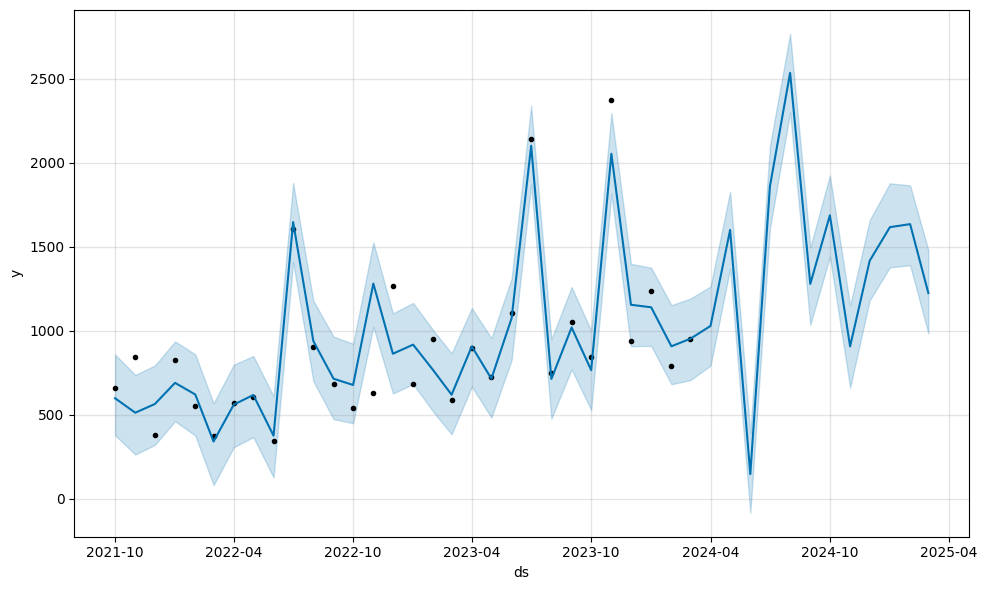

In [5]:
# Automatic plotting of a given dataframe
figure1 = model.plot(forecast)

In [6]:
# Interactive plot
# For monthly data, 1month and 1week, components in general not available
from prophet.plot import plot_plotly, plot_components_plotly
plot_plotly(model, forecast)

Saturating forecasts - minimums and maximums

In [7]:
# We need to add an additional column to the dataframe - cap for maximum, floor for minimum, and pass that to the model
monthly["floor"] = 0

# A cap is NEEDED, not optional. Floor is optional.

# Arbitrarily high cap:
monthly["cap"] = 10000
monthly.tail()

,y,ds,floor,cap
Date,,,,
2023-11-01,2373.00,2023-11-01,0,10000
2023-12-01,937.80,2023-12-01,0,10000
2024-01-01,1235.74,2024-01-01,0,10000
2024-02-01,789.50,2024-02-01,0,10000
2024-03-01,952.70,2024-03-01,0,10000


In [8]:
model_logistic = Prophet(growth = "logistic")
model_logistic.fit(monthly)

13:51:54 - cmdstanpy - INFO - Chain [1] start processing
13:51:54 - cmdstanpy - INFO - Chain [1] done processing


In [9]:
future = model_logistic.make_future_dataframe(periods = 12, freq = "MS")
future["cap"] = 10000
future["floor"] = 0
future.tail()

,ds,cap,floor
37,2024-11-01,10000,0
38,2024-12-01,10000,0
39,2025-01-01,10000,0
40,2025-02-01,10000,0
41,2025-03-01,10000,0


c:\Projekti_programiranje\Python\Python projects\ML_in_Python\time_series_expenses\.venv\Lib\site-packages\prophet\plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

c:\Projekti_programiranje\Python\Python projects\ML_in_Python\time_series_expenses\.venv\Lib\site-packages\prophet\plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



(0.0, 3000.0)

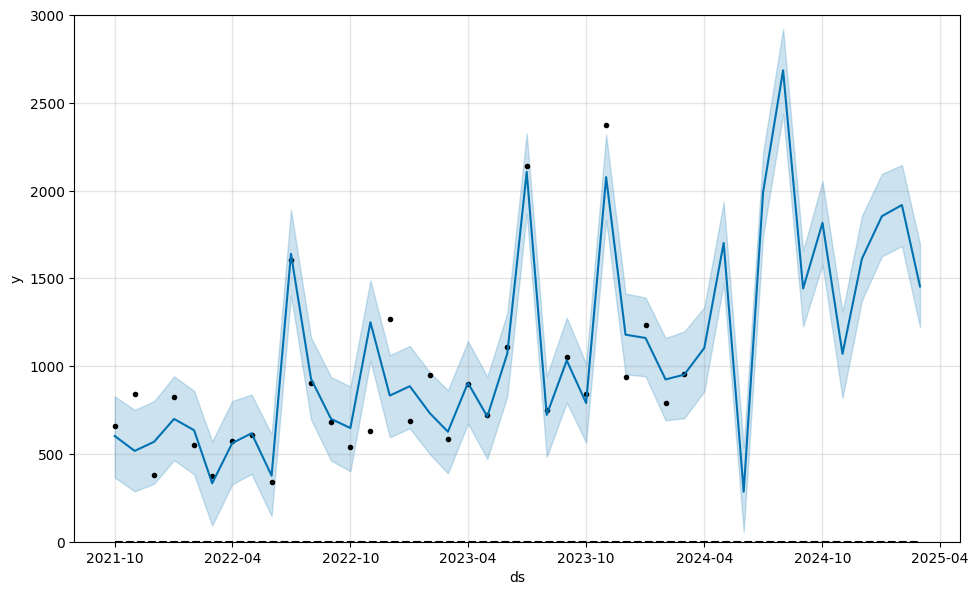

In [10]:
forecast2 = model_logistic.predict(future)
fig_logistic = model_logistic.plot(forecast2)

# Set the axis to not stretch to 10000
axes = fig_logistic.gca()
axes.set_ylim([0, 3000])

## Cross validation

In [25]:
monthly_model = Prophet(yearly_seasonality= True, weekly_seasonality= False, daily_seasonality=False)
# Info for monthly seasonality: https://stackoverflow.com/a/71810822/21445669
monthly_model.add_seasonality(
    name = "monthly",
    period = 30.5,
    fourier_order= 5
)
monthly_model.fit(monthly)

14:03:12 - cmdstanpy - INFO - Chain [1] start processing
14:03:12 - cmdstanpy - INFO - Chain [1] done processing


In [26]:
# Predict next year
future = monthly_model.make_future_dataframe(periods = 12, freq = "MS")
forecast = monthly_model.predict(future)[["ds", "yhat", "yhat_lower", "yhat_upper"]]

forecast.tail(13)

,ds,yhat,yhat_lower,yhat_upper
29,2024-03-01,956.337524,761.033900,1151.819616
30,2024-04-01,2436.708479,2243.296313,2625.974471
31,2024-05-01,1386.028316,1192.605650,1587.683096
32,2024-06-01,1216.527989,1015.073265,1425.772476
33,2024-07-01,1287.025440,1089.819001,1478.355685
34,2024-08-01,3333.430511,3111.523046,3523.802123
35,2024-09-01,2153.353838,1942.545202,2335.902606
36,2024-10-01,2324.469344,2128.524144,2515.058419
37,2024-11-01,1214.924548,1023.298019,1405.253620
38,2024-12-01,2111.664311,1901.745116,2322.263030


c:\Projekti_programiranje\Python\Python projects\ML_in_Python\time_series_expenses\.venv\Lib\site-packages\prophet\plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

c:\Projekti_programiranje\Python\Python projects\ML_in_Python\time_series_expenses\.venv\Lib\site-packages\prophet\plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



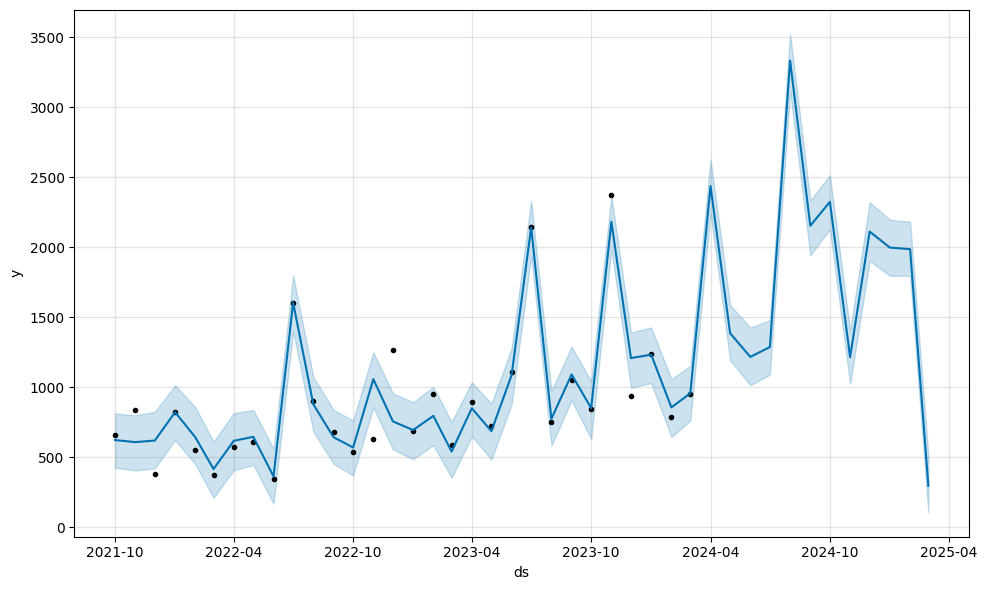

In [27]:
# Automatic plotting of a given dataframe
figure2 = monthly_model.plot(forecast)